In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
import pickle
xgb.set_config(verbosity=1) #turn down info

from sklearn import tree
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt


from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import confusion_matrix
import itertools

## training set, validation set, testing set

In [2]:
train_set = pd.read_csv('train_set_V.csv')[:1000000]
valid_set = pd.read_csv('val_set_V.csv')[:10000]
test_set = pd.read_csv('test_set_V.csv')[:10000]


In [3]:
train_set.head()

,AGE,HAS_AE,HAS_AW,HAS_IP,LOGICAL_FACTOR_1,LOGICAL_FACTOR_2,SEX_K,SEX_M,SEX_N,NATIONALITY_0,...,PKD_GROUP_90,PKD_GROUP_91,PKD_GROUP_93,PKD_GROUP_95,PKD_GROUP_96,PKD_GROUP_97,PKD_GROUP_98,PKD_GROUP_99,PKD_GROUP_na,TARGET
0,0.121117,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.816647,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.714663,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.201953,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1.150431,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_train = np.array(train_set['TARGET'])
x_train = np.array(train_set.drop(['TARGET'], axis=1))

y_val = np.array(valid_set['TARGET'])
x_val = np.array(valid_set.drop(['TARGET'], axis=1))

y_test = np.array(test_set['TARGET'])
x_test = np.array(test_set.drop(['TARGET'], axis=1))

In [5]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(1000000, 202) (1000000,)
(10000, 202) (10000,)
(10000, 202) (10000,)


# XGBClassifier using xgboost library

In [6]:
n_estimators =60
max_depth = 40

classifier = xgb.XGBClassifier()
classifier.fit(x_train, y_train)

[14:00:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [7]:
output = classifier.predict(x_test)
target = y_test
accuracy = sum(output == target)/ len(target)
print("\nAccuracy on testing set: {:.4f} %".format(accuracy*100))


Accuracy on testing set: 86.7300 %


recall 0.42569124423963134
precision 0.6913002806361085


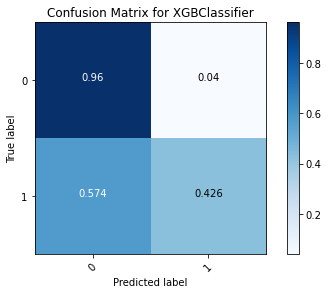

In [8]:
classes = [0,1]
y_true = y_test
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_true, y_pred, normalize ='true')

plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix for XGBClassifier")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],3), horizontalalignment="center", color="white" if cm[i, j] > 0.5 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print("recall", recall_score(y_true, y_pred))
print("precision", precision_score(y_true, y_pred))

## new - BAD

In [9]:
n_estimators =60
max_depth = 50

classifier = xgb.XGBClassifier(n_estimators=n_estimators, 
                               max_depth=max_depth, 
                               min_child_weight =0.1,
                               learning_rate=0.3)



classifier.fit(x_train, y_train)

[14:02:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=50,
              min_child_weight=0.1, missing=nan, monotone_constraints='()',
              n_estimators=60, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:
output = classifier.predict(x_test)
target = y_test
accuracy = sum(output == target)/ len(target)
print("\nAccuracy on testing set: {:.4f} %".format(accuracy*100))


Accuracy on testing set: 84.4300 %


recall 0.44873271889400923
precision 0.564902102973169


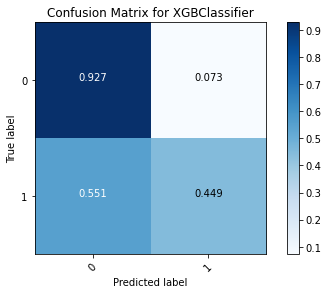

In [11]:
classes = [0,1]
y_true = y_test
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_true, y_pred, normalize ='true')

plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix for XGBClassifier")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],3), horizontalalignment="center", color="white" if cm[i, j] > 0.5 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

print("recall", recall_score(y_true, y_pred))
print("precision", precision_score(y_true, y_pred))

## Feature importance

In [12]:
feature_important = classifier.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

features = list(train_set.columns)
name_features = []
for k in keys:
    index = int(k[1:])
    name_features.append(features[index])


df_feature_important = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
df_feature_important['name_features']=name_features
df_feature_important.head(15)

,score,name_features
f0,1291511,RATIO_IS_SUSPENDED_0.0
f6,51859,HAS_IP
f54,27415,RATIO_IS_SUSPENDED_1.0
f50,26566,AGE
f75,22834,PPK_BANK_6
f45,21996,PPK_STAGE_1
f68,20233,PPK_BANK_15
f71,19837,COMPANY_TYPE_18.0
f66,18512,PPK_STAGE_2
f7,17859,COMPANY_SIZE_B


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

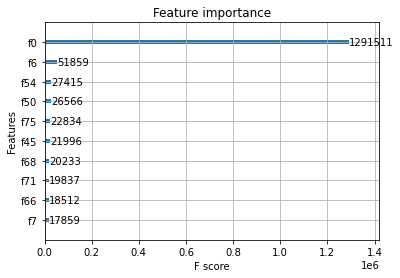

In [13]:
xgb.plot_importance(classifier, importance_type='weight',max_num_features=10 )

In [14]:
feature_important = classifier.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

features = list(train_set.columns)
name_features = []
for k in keys:
    index = int(k[1:])
    name_features.append(features[index])


df_feature_important = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
df_feature_important['name_features']=name_features
df_feature_important.head(15)

,score,name_features
f3,25.874635,RATIO_IS_SUSPENDED_0.0
f63,22.956860,HAS_IP
f113,17.876407,RATIO_IS_SUSPENDED_1.0
f114,10.826160,AGE
f60,8.968623,PPK_BANK_6
f158,3.258997,PPK_STAGE_1
f61,1.702856,PPK_BANK_15
f154,1.636685,COMPANY_TYPE_18.0
f190,1.624873,PPK_STAGE_2
f112,1.485348,COMPANY_SIZE_B


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

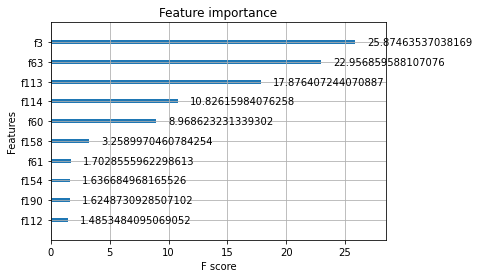

In [15]:
xgb.plot_importance(classifier, importance_type='gain',max_num_features=10 )

In [16]:
STOP

NameError: name 'STOP' is not defined

## Save model

In [ ]:
file_name = "xgb_model.pkl"

# save
pickle.dump(classifier, open(file_name, "wb"))

# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

# FINAL EVALUATION OF THE MODEL: XGBoost

In [ ]:
xgb_model_loaded = pickle.load(open(file_name, "rb"))

output = xgb_model_loaded.predict(x_train)
target = y_train
accuracy = sum(output == target)/ len(target)
print("\nAccuracy on testing set: {:.4f} %".format(accuracy*100))

output = xgb_model_loaded.predict(x_val)
target = y_val
accuracy = sum(output == target)/ len(target)
print("\nAccuracy on testing set: {:.4f} %".format(accuracy*100))

output = xgb_model_loaded.predict(x_test)
target = y_test
accuracy = sum(output == target)/ len(target)
print("\nAccuracy on testing set: {:.4f} %".format(accuracy*100))